<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Regression - Final Assignment</font></h1>


## Instructions:

In this Assignment, you will demonstrate the data regression skills you have learned by completing this course. You are expected to leverage a wide variety of tools, but also this report should focus on present findings, insights, and next steps. You may include some visuals from your code output, but this report is intended as a summary of your findings, not as a code review.

The grading will center around 5 main points:

1.  Does the report include a section describing the data?
2.  Does the report include a paragraph detailing the main objective(s) of this analysis?
3.  Does the report include a section with variations of linear regression models and specifies which one is the model that best suits the main objective(s) of this analysis.
4.  Does the report include a clear and well-presented section with key findings related to the main objective(s) of the analysis?
5.  Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques?


## Import the required libraries


The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np

from scipy import stats
from scipy.stats import boxcox
from scipy.stats.mstats import normaltest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
%matplotlib inline

## Importing the Dataset


Before you begin, you will need to choose a data set that you feel passionate about. You can brainstorm with your peers about great public data sets using the discussion board in this module.


Read your chosen dataset into pandas dataframe:


In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.
Sections required in your report:

*   Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.
*   Brief description of the data set you chose and a summary of its attributes.
*   Brief summary of data exploration and actions taken for data cleaning and feature engineering.
*   Summary of training at least three linear regression models which should be variations that cover using a simple  linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.
*   A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.
*   Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.
*   Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.


# 1. About the Data


First, we will perform some basic Exploratory Data Analysis. 

In [5]:
data.shape

(1338, 7)

In [6]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The dataset comprises 1338 records with 7 features, including 3 categorical and 4 numerical variables. Notably, there are no null values present.

In [8]:
#drop duplicates
data.drop_duplicates()
data.shape

(1338, 7)

Now, let's count records grouped by categorical variables.

In [9]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [10]:
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [11]:
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

The distribution of records by sex and region is approximately equal. However, the non-smoking population is significantly larger than the smoking population.

In [12]:
data.groupby('region').mean()

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


In [13]:
data.groupby('sex').mean()

,age,bmi,children,charges
sex,,,,
female,39.503021,30.377749,1.074018,12569.578844
male,38.917160,30.943129,1.115385,13956.751178


In [14]:
data.groupby('smoker').mean()

,age,bmi,children,charges
smoker,,,,
no,39.385338,30.651795,1.090226,8434.268298
yes,38.514599,30.708449,1.113139,32050.231832


The data above displays the means of numerical features grouped by categorical features. The means do not significantly vary based on sex and region. However, smokers exhibit significantly larger medical charges than non-smokers.

In [15]:
#Correlation coefficients for numerical features
data.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [16]:
#Correlation between charges and other numerical features
correlation = data.corr()['charges'].sort_values()
correlation

children    0.067998
bmi         0.198341
age         0.299008
charges     1.000000
Name: charges, dtype: float64

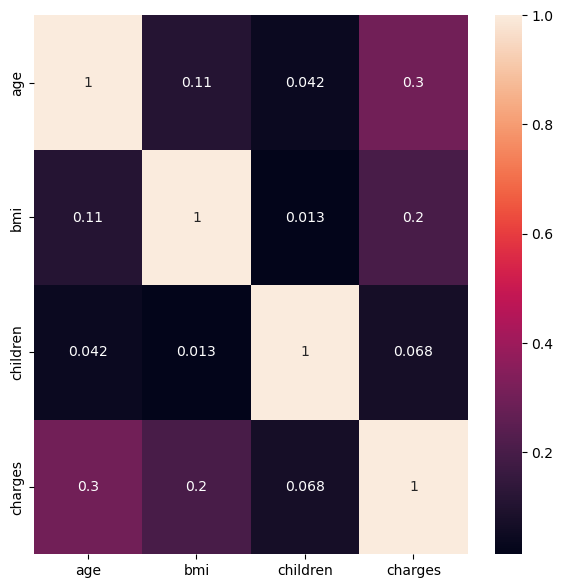

In [17]:
plt.figure(figsize=(7,7))
sns.heatmap(data.corr(),annot=True)

plt.show()

#### Data visualization

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'charges'}>]], dtype=object)

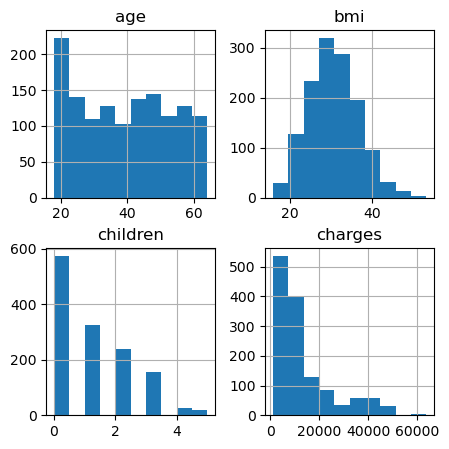

In [18]:
data.hist(figsize=(5,5))

Text(0.5, 1.0, 'charges')

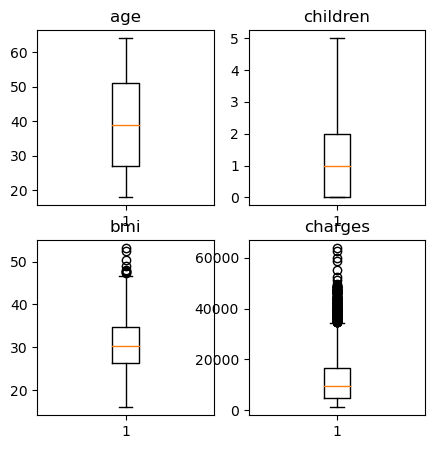

In [19]:
fig, axs = plt.subplots(2, 2, figsize=(5,5))
axs[0, 0].boxplot(data['age'])
axs[0, 0].set_title('age')
axs[0, 1].boxplot(data['children'])
axs[0, 1].set_title('children')
axs[1, 0].boxplot(data['bmi'])
axs[1, 0].set_title('bmi')
axs[1, 1].boxplot(data['charges'])
axs[1, 1].set_title('charges')

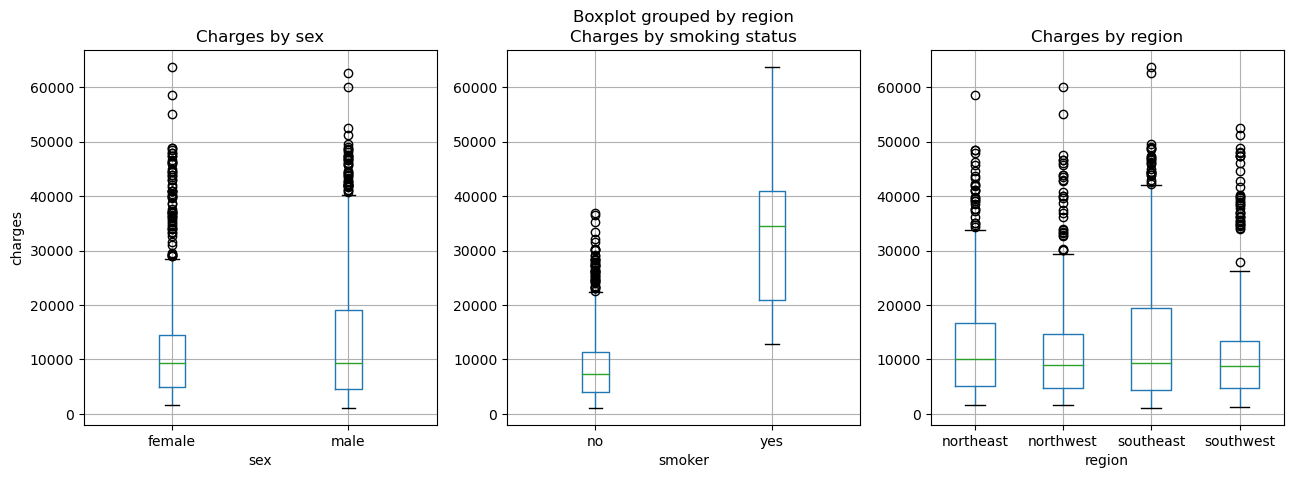

In [20]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))

data.boxplot(column='charges', by='sex', ax=ax[0])
ax[0].set_xlabel('sex')
ax[0].set_ylabel('charges')
ax[0].set_title('Charges by sex')

data.boxplot(column='charges', by='smoker', ax=ax[1])
ax[1].set_xlabel('smoker')
ax[1].set_title('Charges by smoking status')

data.boxplot(column='charges', by='region', ax=ax[2])
ax[2].set_xlabel('region')
ax[2].set_title('Charges by region')

plt.show()

<AxesSubplot:xlabel='age'>

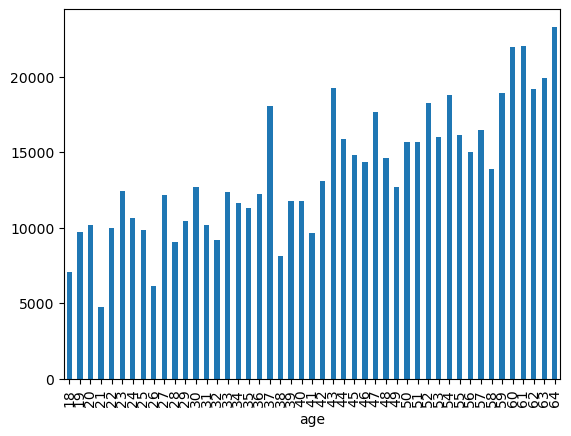

In [21]:
age_charge = data.groupby(['age'])['charges'].mean()
age_charge.plot(kind='bar')

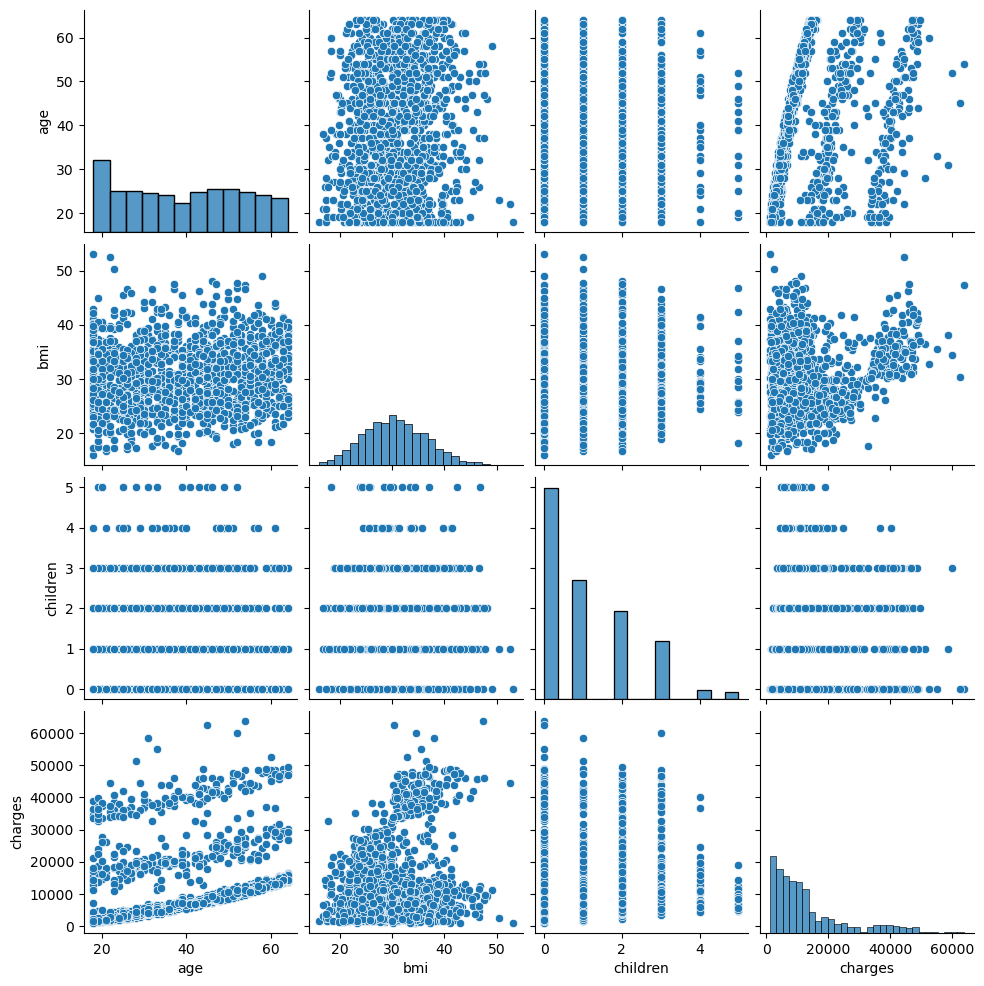

In [22]:
sns.pairplot(data)

Medical charges typically increase slightly with age, but smoking status appears to be a major factor that leads to a significant increase. Other features appear to have a minimal impact on charges.

#### Features Engineering

In [23]:
data1 = data.select_dtypes(include = ['float64', 'int64'])


float_cols = data1.columns
skew_vals = data[float_cols].skew()

skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'}))

skew_cols

,Skew
charges,1.515880
children,0.938380
bmi,0.284047
age,0.055673


In [24]:
#check if target variable is normally distributed

normaltest(data['charges'])

NormaltestResult(statistic=336.8851220567733, pvalue=7.019807901276197e-74)

Our analysis of the skewness of the target variable indicates that it is not normally distributed. This is further supported by the results of the normality test, which have yielded a low p-value, indicating that the data deviates significantly from a normal distribution. 

In [25]:
log_transform = np.log(data['charges'])
normaltest(log_transform)

NormaltestResult(statistic=52.71670509113935, pvalue=3.5703676381337117e-12)

In [26]:
sqrt_transform = np.sqrt(data['charges'])
normaltest(sqrt_transform)

NormaltestResult(statistic=112.4605295472106, pvalue=3.7975744156203163e-25)

In [27]:
boxcox_result = boxcox(data['charges'])
normaltest(boxcox_result[0])

NormaltestResult(statistic=54.4181017156977, pvalue=1.5249631686757666e-12)

In [28]:
data['charges'] = boxcox_result[0]  #we decide for boxcox transformation

Our analysis has shown that various types of transformations have been unsuccessful in producing a normally distributed target variable, as evidenced by the low p-values on the normality test.While non-normality in the target variable can be problematic, the key focus in regression modeling should be on the normality of the residuals, as this is essential for ensuring accurate and reliable predictions.

To improve the accuracy of our predictions, it is advisable to remove outliers before developing a linear model. This is because outliers have a tendency to significantly alter the direction of the fitted line, leading to poor extrapolation results. Therefore, by removing outliers, we can ensure that our linear model captures the underlying patterns in the data more effectively, resulting in more reliable predictions.

In [29]:
z = np.abs(stats.zscore(data1.astype(float)))
print(np.where(z > 3))

(array([  32,   34,   71,  116,  166,  413,  425,  438,  543,  568,  577,
        640,  819,  847,  877,  932,  937,  969,  984, 1047, 1085, 1116,
       1130, 1146, 1230, 1245, 1272, 1300, 1317]), array([2, 3, 2, 1, 2, 2, 2, 2, 3, 2, 3, 2, 3, 1, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 3, 3, 2, 2, 3, 1]))


In [30]:
data = data[(z < 3).all(axis=1)]
data.reset_index(drop=True)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,12.128980
1,18,male,33.770,1,no,southeast,8.808596
2,28,male,33.000,3,no,southeast,10.147521
3,33,male,22.705,0,no,northwest,12.534950
4,32,male,28.880,0,no,northwest,9.945637
...,...,...,...,...,...,...,...
1304,50,male,30.970,3,no,northwest,11.424196
1305,18,female,31.920,0,no,northeast,9.150491
1306,18,female,36.850,0,no,southeast,8.729683
1307,21,female,25.800,0,no,southwest,9.019131


To ensure our model is properly trained and captures all the relevant information, we perform one hot encoding for all categorical variables. 

In [31]:
data = pd.get_dummies(data, columns=['sex','smoker','region'], drop_first=True)

# 2. Objectives


Our objective is to build a highly accurate predictive model, and to achieve this, we will employ a variety of techniques. Firstly, we will develop a simple linear model to establish a baseline for comparison. We will then progress to building a polynomial model, which can capture nonlinear relationships between variables, and further improve the accuracy of our predictions. However, to ensure that our model is robust and performs well under different conditions, we will also incorporate a Ridge model, which can account for multicollinearity between predictor variables. 

By combining these different modeling techniques, we can develop a predictive model that is capable of accurately capturing the underlying patterns in the data, while also being flexible and adaptable enough to perform well under a variety of different scenarios.

# 3. Linear Regression Models


### Simple linear regression

In [32]:
#Train-test split

X = data.drop('charges', axis=1)
y = data['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
#Standardize data

ss=StandardScaler()
X_train_ss=ss.fit_transform(X_train)

In [34]:
#Linear regression

lm = LinearRegression()
lm.fit(X_train_ss,y_train)

LinearRegression()

In [35]:
#Make predictions

X_test_ss=ss.transform(X_test)
predictions = lm.predict(X_test_ss)

In [36]:
#R squared

print(lm.score(X_test_ss,y_test))     #test data
print(lm.score(X_train_ss,y_train))   #train data

0.7975444671447536
0.7553930586376766


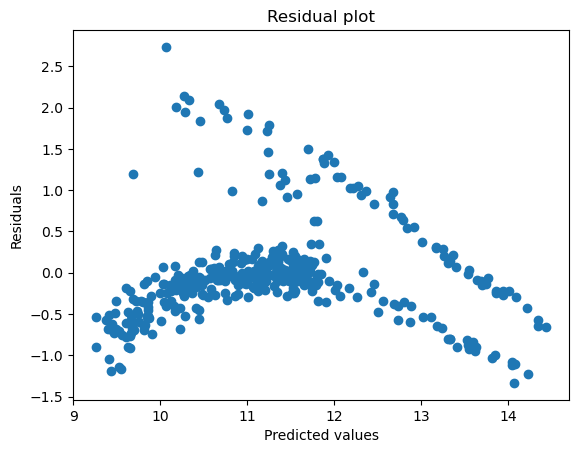

In [37]:
#Check for homoscedasticity

residuals = y_test - predictions

plt.scatter(predictions, residuals)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.show()

The simple linear regression model has provided us with an R-squared value of 0.77 on the test data, indicating a good fit for the data. Furthermore, the residual plot shows that there is no random distribution of residuals, suggesting that the assumptions of the model are met. However, it appears that this linear model may not fully capture the complex relationships within the data. To address this, we will proceed to build a polynomial regression model in the next section.

### Polynomial Regression

In [38]:
#Use GridSearch to find best hyperparameters of the model

Input=[('ss',StandardScaler() ), ('polynomial', PolynomialFeatures(include_bias=False,degree=2)), ('model',LinearRegression())]
pipe=Pipeline(Input)

param_grid = {
    "polynomial__degree": [1, 2, 3],
    "model__normalize":[True, False]
    
}

search = GridSearchCV(pipe, param_grid, n_jobs=1)

search.fit(X_train, y_train)
search

GridSearchCV(estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('polynomial',
                                        PolynomialFeatures(include_bias=False)),
                                       ('model', LinearRegression())]),
             n_jobs=1,
             param_grid={'model__normalize': [True, False],
                         'polynomial__degree': [1, 2, 3]})

In [39]:
#Display best parameters

best=search.best_estimator_
best

Pipeline(steps=[('ss', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression(normalize=True))])

We can see that best parameters are degree=2 and normalize=True

In [40]:
#Test the model

print(best.score(X_test,y_test))   #test data
print(best.score(X_train,y_train))  #train data

0.8796065385481656
0.8192884069269974


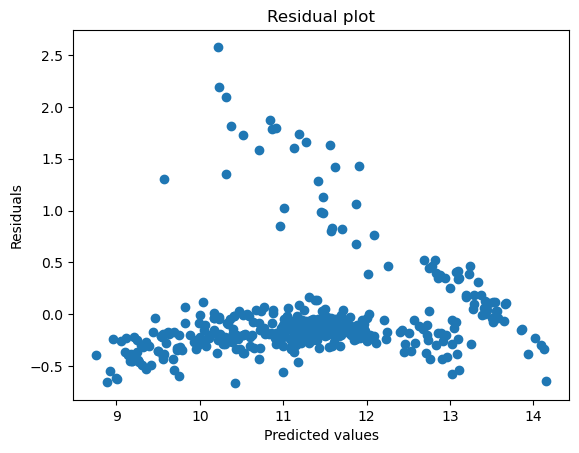

In [41]:
predictions = best.predict(X_test)
residuals = y_test - predictions

plt.scatter(predictions, residuals)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.show()

The model exhibits improved performance, as evidenced by an R-squared value of 0.88 on test data. However, there is still evidence of heteroscedasticity, suggesting that the assumption of homoscedasticity is not fully met. Heteroscedasticity can impact the predictive accuracy of the model, as the model may be overemphasizing the influence of certain predictor variables due to their greater variability in the data.

### Ridge regression

In [42]:
#Use GridSearch to find best hyperparameters of the model

Input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)),('ss',StandardScaler() ), ('model',Ridge(alpha=1))]
pipe = Pipeline(Input)

param_grid = {
    "polynomial__degree": [1,2,3,4],
    "model__alpha":[0.0001,0.001,0.01,0.1,1,10]
}

search = GridSearchCV(pipe, param_grid, n_jobs=2)

search.fit(X_train.astype('float64'), y_train)
search

GridSearchCV(estimator=Pipeline(steps=[('polynomial',
                                        PolynomialFeatures(include_bias=False)),
                                       ('ss', StandardScaler()),
                                       ('model', Ridge(alpha=1))]),
             n_jobs=2,
             param_grid={'model__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'polynomial__degree': [1, 2, 3, 4]})

In [43]:
#Display best parameters and best scores

print("best_score_: ",search.best_score_)
print("best_params_: ",search.best_params_)

best = search.best_estimator_
print(best)

best_score_:  0.8051834105619833
best_params_:  {'model__alpha': 1, 'polynomial__degree': 2}
Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('ss', StandardScaler()), ('model', Ridge(alpha=1))])


In [44]:
#Test the model

print(best.score(X_test, y_test))   #test data
print(best.score(X_train, y_train))   #train data

0.8791343189447517
0.8196073256193046


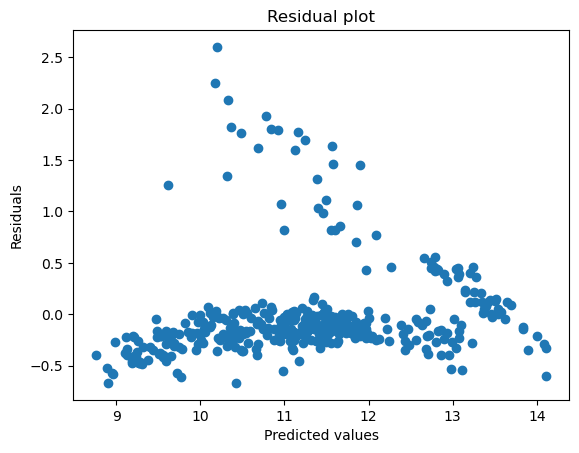

In [45]:
predictions = best.predict(X_test)
residuals = y_test - predictions

plt.scatter(predictions, residuals)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.show()

Based on the results, it appears that polynomial regression and ridge regression produce similar outcomes, which is not surprising given that there is no substantial multicollinearity between the variables. However, it is important to note that homoscedasticity is still not met.

# 4. Insights and key findings


Based on our analysis, we can infer that the polynomial model with a degree of 2 exhibits a high degree of predictive accuracy, which is comparable to that of the ridge regression model. In contrast, the simple linear model demonstrates a relatively lower level of predictive accuracy. These results suggest the presence of intricate interdependencies among the variables that are adequately captured by the polynomial model, but with no significant evidence of multicollinearity.

Furthermore, the test prediction accuracy of approximately 88% indicates a high level of reliability and underscores the robustness of the polynomial model in accurately predicting outcomes. However, none of the models despite high degree of predictive accuracy,
satisfy the homoscedasticity assumption.

# 5. Next Steps


Based on our analysis, we can conclude that regression is a generally effective modeling technique for creating predictive models for the given dataset. However, since the assumption of homoscedasticity is not met, it may be necessary to consider other modeling techniques that are less sensitive to this assumption to improve the predictive accuracy and reliability of the models. This may include the use of decision trees, support vector machines, generalized linear models, or ensemble methods. Careful consideration of the specific characteristics of the data and the research question is crucial in selecting the most appropriate modeling approach.

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
